In [66]:
!pip install xgboost
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import numpy as np
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling
from sklearn.preprocessing import OneHotEncoder ## categorical to numerical
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import xgboost as xb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedGroupKFold
pd.set_option('display.max_columns',None)
from sklearn.feature_selection import mutual_info_classif  ## good for only classification problem 
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb

In [76]:
df=pd.read_excel("train.xlsx")

In [77]:
df.head() 

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [78]:
len(df["target"].unique())

160

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [80]:
df.isnull().sum().sum()

0

In [81]:
df.duplicated().sum()

1267

In [82]:
df.drop_duplicates(keep='first',inplace=True)

In [83]:
numerical_feat=[feature for feature in df.columns if df[feature].dtype!='O']

In [84]:
len(numerical_feat)

18

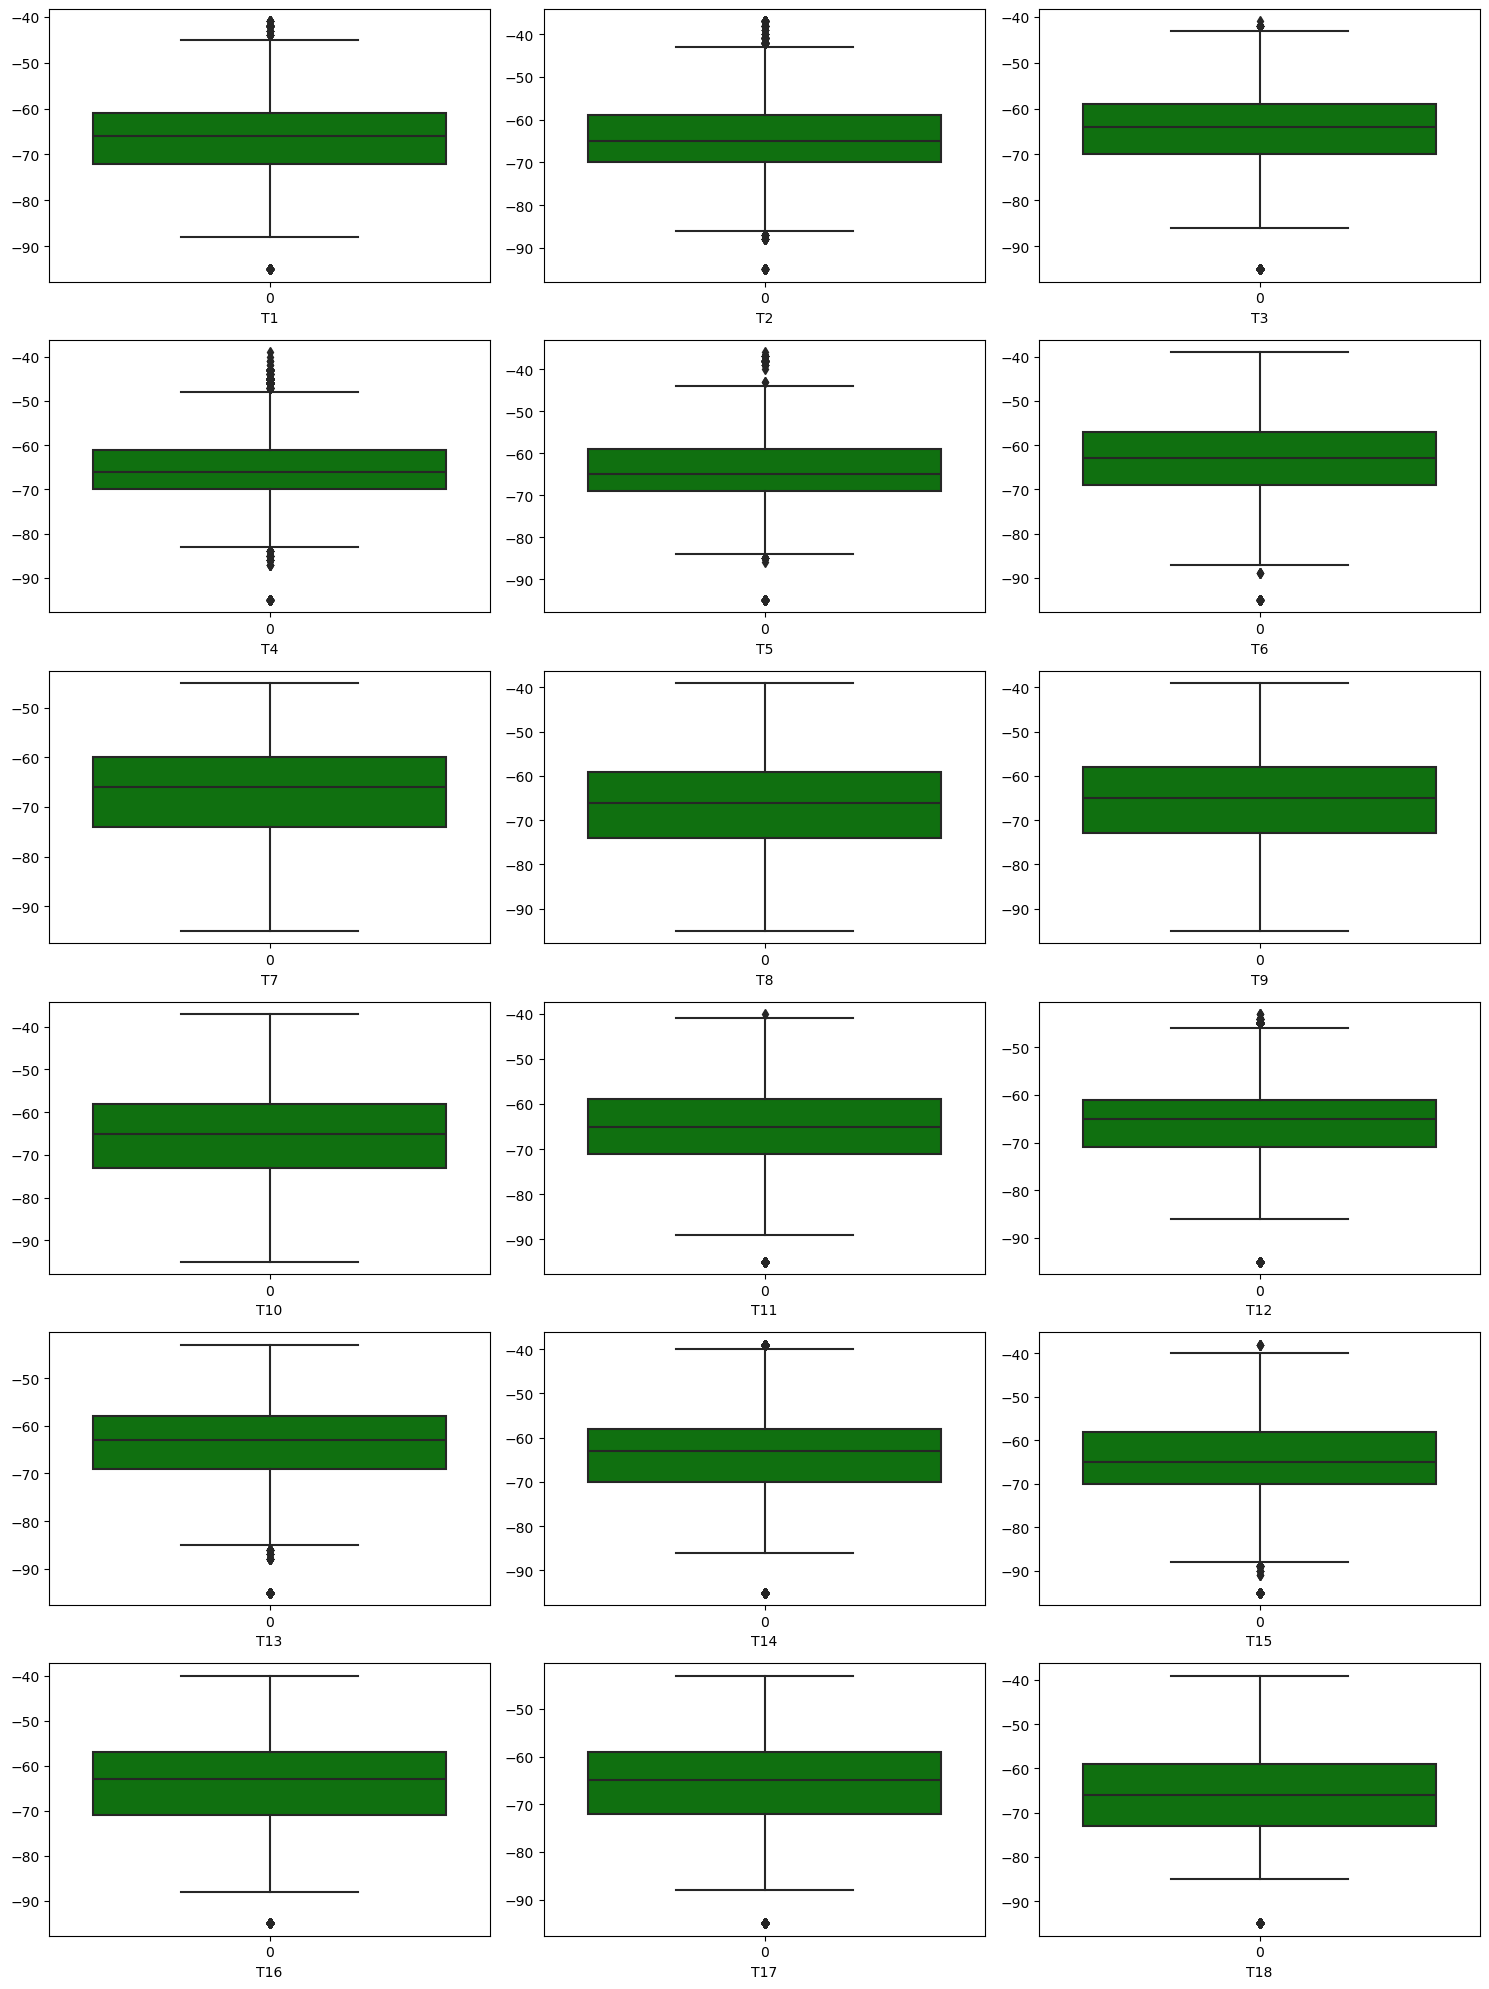

In [85]:
plt.figure(figsize=(15,20))
for i,feature in enumerate(numerical_feat,1):
    plt.subplot(6,3,i)
    sns.boxplot(df[feature],color='g')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [56]:
# There are less outliers in our dataset 

In [125]:
# using label encoding

In [129]:
encoding=LabelEncoder()

In [135]:
len(df['target'].unique())

160

In [137]:
df['target']=encoding.fit_transform(df['target'])

# Lets train dataset without removing outliers 

In [153]:
models=(RandomForestClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(),SVC(),xgb.XGBClassifier())

In [155]:
X=df.drop("target",axis=1)
y=df.target

In [157]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [159]:
def models_feat(X_train,X_test,y_train,y_test,models):
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        Y_pred=model.predict(X_train)
        print(model,'Training',accuracy_score(y_train,Y_pred))
        print(model,'Testing',accuracy_score(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        print(confusion_matrix(y_test,y_pred))
        print('******************')

In [161]:
models_feat(x_train,x_test,y_train,y_test,models)

RandomForestClassifier() Training 0.9995068338734676
RandomForestClassifier() Testing 0.9883049175708045
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.82      1.00      0.90        33
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        78
           6       1.00      0.99      0.99        88
           7       1.00      1.00      1.00        50
           8       1.00      0.98      0.99        44
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        37
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        94
          14       1.00      1.00      1.00        33
          15       1.00      1

# Random forest Classifier is giving best accuracy 

In [165]:
model=RandomForestClassifier()

In [171]:
df_test=pd.read_excel("test.xlsx")

In [169]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [175]:
prediction=model.predict(df_test)

In [183]:
pred=pd.DataFrame(prediction,columns=["target"])

In [189]:
pred.to_excel("pred.xlsx",index=False)

In [191]:
df_target=pd.read_excel("pred.xlsx")

In [193]:
df_target

,target
0,151
1,1
2,141
3,92
4,63
...,...
15747,68
15748,82
15749,145
15750,31


In [197]:
pd.concat([df_target,df_test],axis=1)

,target,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,151,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,141,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,92,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,63,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,68,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,82,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,145,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,31,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69
